<a href="https://colab.research.google.com/github/mohamed-arif-nather/Chennai_tax_dnn_model/blob/main/chennai_tax_reg_dnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Property_Tax_Data_Chennai_2013_to_2018_1.csv')

In [ ]:
df.head()

,City Name,Zone Name,Ward Name,Ward No.,2013-14 - Property Tax Collection (in crores) - Residential,2014-15 - Property Tax Collection (in crores) - Residential,2015-16 - Property Tax Collection (in crores) - Residential,2016-17 - Property Tax Collection (in crores) - Residential,2017-18 - Property Tax Collection (in crores) - Residential,2013-14 - Property Tax Demand (in crores) - Residential,...,2013-14 - Property Tax Collection (in crores) - Commercial,2014-15 - Property Tax Collection (in crores) - Commercial,2015-16 - Property Tax Collection (in crores) - Commercial,2016-17 - Property Tax Collection (in crores) - Commercial,2017-18 - Property Tax Collection (in crores) - Commercial,2013-14 - Property Tax Demand (in crores) - Commercial,2014-15 - Property Tax Demand (in crores) - Commercial,2015-16 - Property Tax Demand (in crores) - Commercial,2016-17 - Property Tax Demand (in crores) - Commercial,2017-18 - Property Tax Demand (in crores) - Commercial
0,CHENNAI,Thiruvotriyur,NaN,N001,0.178004,0.215162,0.210472,0.231799,0.198523,0.198166,...,0.006969,0.008180,0.007610,0.015460,0.021689,0.007988,0.011031,0.009822,0.015122,0.018600
1,CHENNAI,Thiruvotriyur,NaN,N002,2.353545,2.556283,2.643120,2.303494,2.046544,2.625964,...,0.174627,0.158427,0.135745,0.150529,0.163712,0.134172,0.137991,0.143123,0.133540,0.122461
2,CHENNAI,Thiruvotriyur,NaN,N003,1.563880,1.523974,1.694274,1.259573,1.240770,1.583485,...,0.002200,0.002421,0.000000,0.000712,0.006352,0.002244,0.002461,0.004027,0.005562,0.005562
3,CHENNAI,Thiruvotriyur,NaN,N004,0.348721,0.368463,0.293843,0.368063,0.374815,0.363033,...,0.039627,0.045697,0.036238,0.053738,0.081227,0.035639,0.041145,0.034464,0.055979,0.062338
4,CHENNAI,Thiruvotriyur,NaN,N005,2.280307,2.392901,1.776873,1.417799,1.948413,2.904071,...,0.419472,0.583087,3.037925,0.720612,1.718697,1.290175,1.351675,1.233010,1.256079,1.291823


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   City Name                                                    200 non-null    object 
 1   Zone Name                                                    200 non-null    object 
 2   Ward Name                                                    0 non-null      float64
 3   Ward No.                                                     200 non-null    object 
 4   2013-14 - Property Tax Collection (in crores) - Residential  200 non-null    float64
 5   2014-15 - Property Tax Collection (in crores) - Residential  200 non-null    float64
 6   2015-16 - Property Tax Collection (in crores) - Residential  200 non-null    float64
 7   2016-17 - Property Tax Collection (in crores) - Residential  200 non-null    flo

In [ ]:
df.describe()

,Ward Name,2013-14 - Property Tax Collection (in crores) - Residential,2014-15 - Property Tax Collection (in crores) - Residential,2015-16 - Property Tax Collection (in crores) - Residential,2016-17 - Property Tax Collection (in crores) - Residential,2017-18 - Property Tax Collection (in crores) - Residential,2013-14 - Property Tax Demand (in crores) - Residential,2014-15 - Property Tax Demand (in crores) - Residential,2015-16 - Property Tax Demand (in crores) - Residential,2016-17 - Property Tax Demand (in crores) - Residential,...,2013-14 - Property Tax Collection (in crores) - Commercial,2014-15 - Property Tax Collection (in crores) - Commercial,2015-16 - Property Tax Collection (in crores) - Commercial,2016-17 - Property Tax Collection (in crores) - Commercial,2017-18 - Property Tax Collection (in crores) - Commercial,2013-14 - Property Tax Demand (in crores) - Commercial,2014-15 - Property Tax Demand (in crores) - Commercial,2015-16 - Property Tax Demand (in crores) - Commercial,2016-17 - Property Tax Demand (in crores) - Commercial,2017-18 - Property Tax Demand (in crores) - Commercial
count,0.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,NaN,0.895346,1.111429,1.040951,1.261169,1.269738,1.112418,1.163613,1.195205,1.256708,...,1.230733,1.799746,1.857878,2.174133,2.269353,1.723352,1.796417,1.759380,1.965728,2.113603
std,NaN,0.742890,0.831152,0.766503,0.908887,0.924914,1.036075,1.015849,0.990708,1.011122,...,2.461846,3.541381,3.397493,3.958546,4.064174,3.333318,3.413293,3.298992,3.596801,3.792148
min,NaN,0.027271,0.065379,0.000174,0.089967,0.089325,0.047851,0.057297,0.091790,0.097244,...,0.002200,0.002421,0.000000,0.000712,0.006352,0.002244,0.002461,0.004027,0.005562,0.005562
25%,NaN,0.395463,0.514077,0.488147,0.631370,0.587493,0.491533,0.520840,0.537828,0.562103,...,0.150816,0.205142,0.252824,0.329659,0.374876,0.190789,0.246386,0.239091,0.298223,0.349954
50%,NaN,0.674560,0.886654,0.845246,1.035217,1.081953,0.874168,0.907191,0.947263,1.028619,...,0.378921,0.588261,0.712754,0.769788,0.850568,0.595147,0.637031,0.664378,0.736467,0.813776
75%,NaN,1.217522,1.527963,1.373733,1.659476,1.726205,1.530271,1.613932,1.689151,1.754810,...,1.078960,1.414328,1.765076,1.812504,1.846335,1.408407,1.459701,1.454873,1.595754,1.702381
max,NaN,6.265334,6.230498,5.072710,6.740310,6.327059,11.212595,10.511348,9.815440,9.846593,...,22.628761,28.139358,27.243536,30.759018,33.286029,27.777219,28.349182,26.508221,29.150566,30.609216


##Separating dependent and independent

In [ ]:
# Drop 'City Name' and 'Ward Name' as they are not useful for modeling
df_processed = df.drop(['City Name', 'Ward Name','Ward No.'], axis=1)

# Separate features (x) and target (y)
y = df_processed.iloc[:, -1]
x = df_processed.iloc[:, :-1]

# Handle categorical features using one-hot encoding
x = pd.get_dummies(x, columns=['Zone Name'], drop_first=True)

In [ ]:
df_processed.head()

,Zone Name,2013-14 - Property Tax Collection (in crores) - Residential,2014-15 - Property Tax Collection (in crores) - Residential,2015-16 - Property Tax Collection (in crores) - Residential,2016-17 - Property Tax Collection (in crores) - Residential,2017-18 - Property Tax Collection (in crores) - Residential,2013-14 - Property Tax Demand (in crores) - Residential,2014-15 - Property Tax Demand (in crores) - Residential,2015-16 - Property Tax Demand (in crores) - Residential,2016-17 - Property Tax Demand (in crores) - Residential,...,2013-14 - Property Tax Collection (in crores) - Commercial,2014-15 - Property Tax Collection (in crores) - Commercial,2015-16 - Property Tax Collection (in crores) - Commercial,2016-17 - Property Tax Collection (in crores) - Commercial,2017-18 - Property Tax Collection (in crores) - Commercial,2013-14 - Property Tax Demand (in crores) - Commercial,2014-15 - Property Tax Demand (in crores) - Commercial,2015-16 - Property Tax Demand (in crores) - Commercial,2016-17 - Property Tax Demand (in crores) - Commercial,2017-18 - Property Tax Demand (in crores) - Commercial
0,Thiruvotriyur,0.178004,0.215162,0.210472,0.231799,0.198523,0.198166,0.205561,0.218596,0.207554,...,0.006969,0.008180,0.007610,0.015460,0.021689,0.007988,0.011031,0.009822,0.015122,0.018600
1,Thiruvotriyur,2.353545,2.556283,2.643120,2.303494,2.046544,2.625964,2.634790,2.644246,2.427350,...,0.174627,0.158427,0.135745,0.150529,0.163712,0.134172,0.137991,0.143123,0.133540,0.122461
2,Thiruvotriyur,1.563880,1.523974,1.694274,1.259573,1.240770,1.583485,1.420973,1.261163,1.265165,...,0.002200,0.002421,0.000000,0.000712,0.006352,0.002244,0.002461,0.004027,0.005562,0.005562
3,Thiruvotriyur,0.348721,0.368463,0.293843,0.368063,0.374815,0.363033,0.340854,0.323633,0.330518,...,0.039627,0.045697,0.036238,0.053738,0.081227,0.035639,0.041145,0.034464,0.055979,0.062338
4,Thiruvotriyur,2.280307,2.392901,1.776873,1.417799,1.948413,2.904071,2.716636,2.439569,2.492487,...,0.419472,0.583087,3.037925,0.720612,1.718697,1.290175,1.351675,1.233010,1.256079,1.291823


##Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

##Standardization

In [ ]:
# Feature scaling is mandatory
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

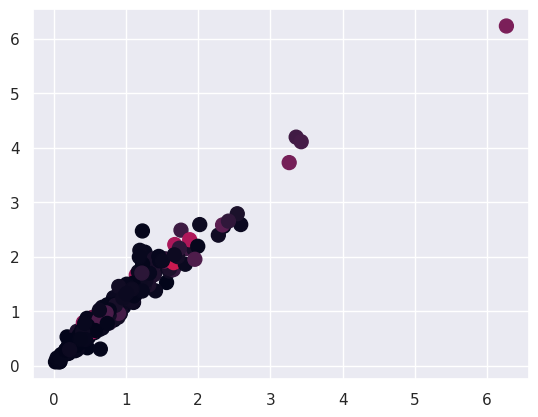

In [ ]:
plt.scatter(x.values[:,0], x.values[:,1], c=y,s=100)
plt.show()

##Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

##Fitting and Training model

Epoch 1/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 145.0989 - mae: 2.6966 - val_loss: 81.1207 - val_mae: 0.9702
Epoch 2/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 89.3841 - mae: 2.7793 - val_loss: 48.2940 - val_mae: 1.2575
Epoch 3/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 45.9717 - mae: 1.7388 - val_loss: 31.5951 - val_mae: 1.4281
Epoch 4/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 34.9008 - mae: 2.4361 - val_loss: 23.5084 - val_mae: 1.4927
Epoch 5/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 24.6416 - mae: 1.7705 - val_loss: 19.0231 - val_mae: 1.2981
Epoch 6/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.2498 - mae: 1.4835 - val_loss: 17.0710 - val_mae: 1.3322
Epoch 7/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.4895 - mae: 1.3881 - val_loss: 14.7018 - val_mae: 1.2264
Epoch 8/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.9617 - mae: 1.2048 - val_loss: 13.8512 - val_mae: 1.3211
Epoch 9/102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - los

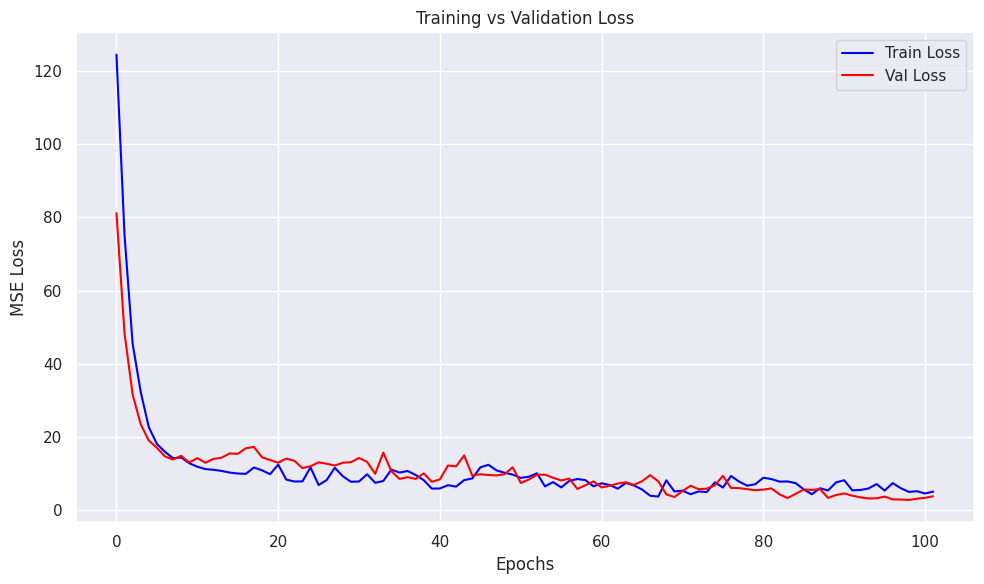

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=96, restore_best_weights=True)

# DNN Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l2(0.98)))
model.add(BatchNormalization())
model.add(Dropout(0.48))

model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.96)))
model.add(BatchNormalization())
model.add(Dropout(0.48))

model.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.94)))
model.add(BatchNormalization())
model.add(Dense(1))  # Regression output
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Training
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=102,
    #batch_size=16,
    callbacks=[early_stop],
    verbose=1
)
y_pred = model.predict(x_test).flatten()
print("MAE:", np.sqrt(mean_absolute_error(y_test, y_pred)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Metrics

In [ ]:
y_pred = model.predict(x_test).flatten()
print("MAE:", np.sqrt(mean_absolute_error(y_test, y_pred)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 0.7531775242967451
RMSE: 0.6978756988019884
R² Score: 0.9384165613277269


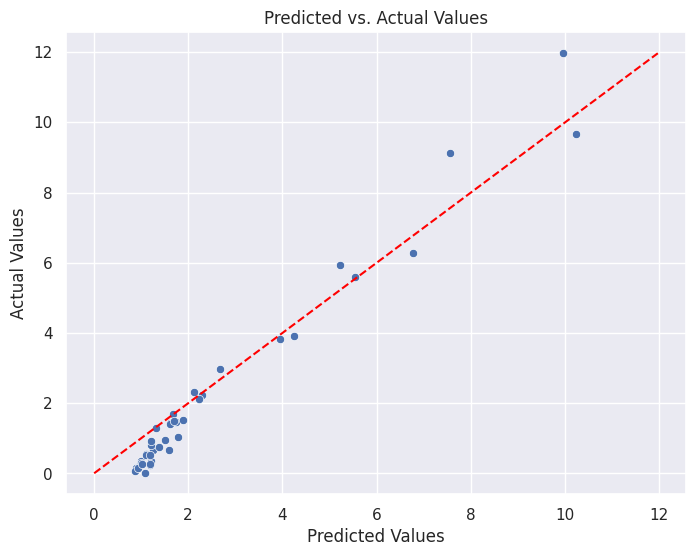

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Diagonal line
plt.grid(True)
plt.show()